## Testing Aksel's "native" geometry<br> Photon bomb at 380nm<br> Using labppo and water

In [1]:
import ROOT, rat
import os, sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
sys.path.append('/home/jp/projects/snoplus/snoing/install/rat-dev/example/pyroot')
sys.path.append('/home/jp/projects/python_tools')
sys.path.append('/home/jp/projects/snoplus/python_modules')
import jp_mpl as jplot
import lowlevel_stats
reload(lowlevel_stats)

TClass::TClass:0: RuntimeWarning: no dictionary for class omtext is available
TClass::TClass:0: RuntimeWarning: no dictionary for class RAT::DU::ShadowingCalculator is available


<module 'lowlevel_stats' from '/home/jp/projects/snoplus/python_modules/lowlevel_stats.pyc'>

In [7]:
outdir = '/home/jp/Dropbox/workflowy/snoplus/nativegeo_validation'

In [3]:
# Reading fcn
def readFile(one_dirname, fname):
    if one_dirname in data.keys():
        print 'This directory is already inside:', one_dirname
        return
    else:
        data[one_dirname] = {}
        
    file_name = os.path.join(basedir, one_dirname, fname)

    data[one_dirname]['nhit'], data[one_dirname]['qtot'] = \
        lowlevel_stats.getHitRegions(file_name)

    return

In [4]:
# Initialize the data dictionary
data = {}

In [8]:
basedir = '/home/jp/projects/snoplus/rundir/nativegeo_verification/pbomb'

In [6]:
mycolors = ['b','r','g','m','c', 'y', '0.6']
def plotComparison(datasets = [], datakey = '', scale_factor = [], 
                   labels = [], figname = '', xaxis = np.arange(0, 100, 2),
                   xlabel = 'Nhits', ylabel = 'Entries', verbose=False):

    if len(scale_factor) == 0:
        scale_factor = [1.]*len(datasets)
    if len(labels) == 0:
        labels = datasets


    # Loop over the different levels
    for k, level in enumerate(['top','middle','bottom']):
        # Reading each of the files one by one
        if verbose:        print '\n****', level , '*****'
        nbins = []
        myfig = plt.figure(figsize=(8,5))    
        
        for i, one_set in enumerate(datasets):
            n, x = np.histogram(data[one_set][datakey][:,k], xaxis)
            nbins.append(n)

            if verbose:
                print '\n',labels[i]

                print 'SUM ', data[one_set][datakey][:,k].sum()*scale_factor[i]
                print 'Mean ', data[one_set][datakey][:,k].mean()
                print 'Std  ', data[one_set][datakey][:,k].std()

            jplot.unfilledBar(xaxis, nbins[-1]*scale_factor[i], 
                                  color = mycolors[i])
            jplot.errorMark(xaxis, nbins[-1]*scale_factor[i], 
                            error=np.sqrt(nbins[-1])*scale_factor[i], color=mycolors[i],
                            label =labels[i] + ' ' + \
                                '\nmean=' + "%.2f" % data[one_set][datakey][:,k].mean() +\
                                '\nstd=' + "%.2f" % data[one_set][datakey][:,k].std()) 

        plt.title(level)



        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

        #plt.ylim([0,])
        plt.legend(loc=0,ncol=1)
        if len(figname) > 0:
            myfig.savefig(os.path.join(outdir, figname + '_' + level + '.png'), dpi=300)

### Using photon bomb

#### Scintillator comparisons

In [7]:
readFile('snoplus_likenative','pbomb380.root')

In [8]:
readFile('snoplusnative','pbomb380.root')

In [14]:
readFile('snoplusnative_noropes','pbomb380.root')

In [15]:
readFile('snoplus_simple','pbomb380.root')

In [9]:
readFile('snoplus','pbomb380.root')

In [16]:
readFile('snoplus_noropes','pbomb380.root')

In [22]:
readFile('snoplusnative_noropes_jpmod','pbomb380.root')

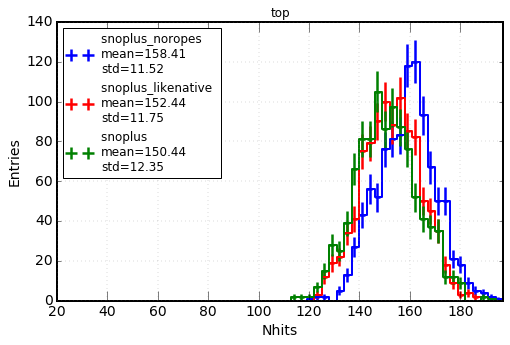

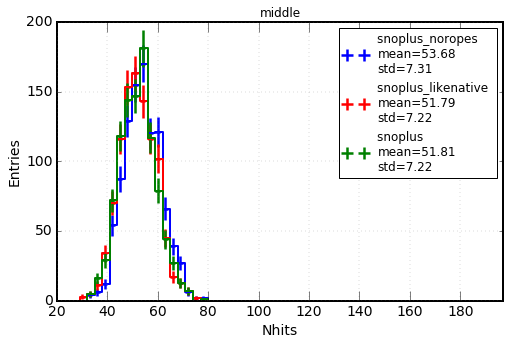

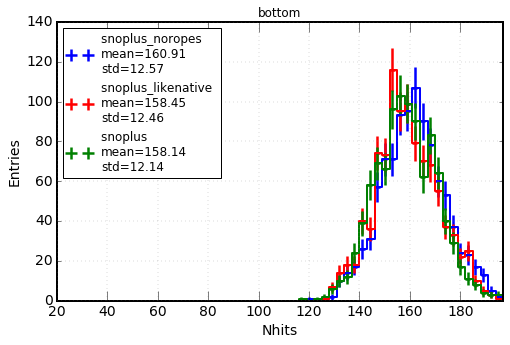

In [17]:
plotComparison(datasets = ['snoplus_noropes',
                           'snoplus_likenative',
                           'snoplus'],
               datakey = 'nhit',
               figname = 'PBomb380_nhit_officialmod',
               xaxis = np.arange(20,200,3),
               xlabel = 'Nhits',
               ylabel = 'Entries')
# The thickness of the ropes is not playing too much of a role ... can I make them REALLY thick?

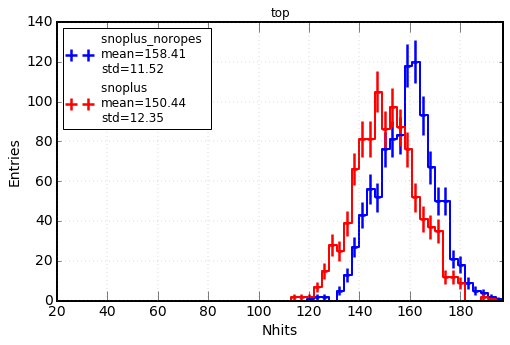

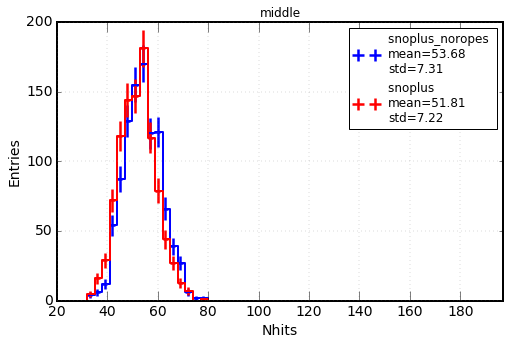

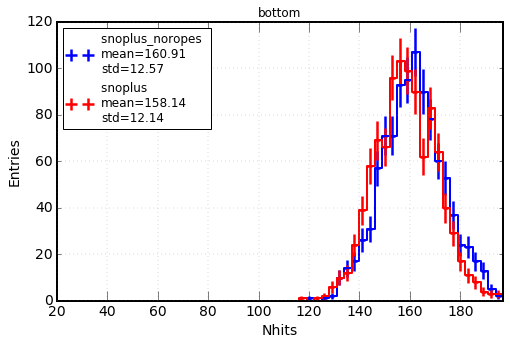

In [34]:
plotComparison(datasets = ['snoplus_noropes',  
                           'snoplus'],
               datakey = 'nhit',
               scale_factor = [1.,1.],
               figname = 'PBomb380_nhit_reference_noropes',
               xaxis = np.arange(20,200,3),
               xlabel = 'Nhits',
               ylabel = 'Entries')

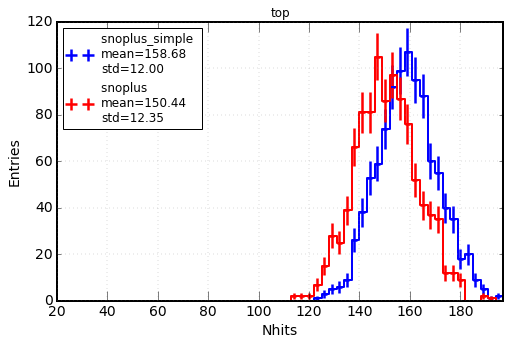

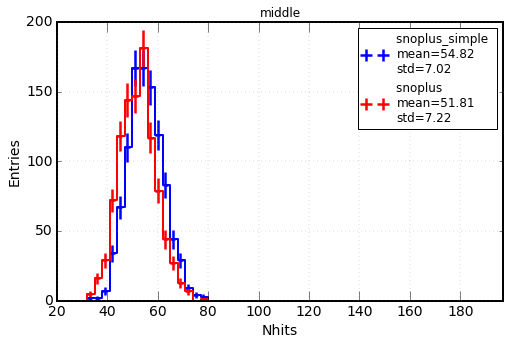

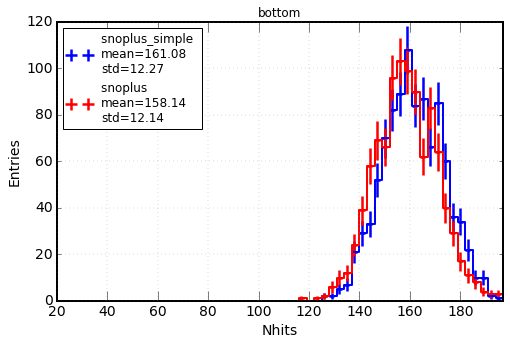

In [35]:
plotComparison(datasets = ['snoplus_simple',  
                           'snoplus'],
               datakey = 'nhit',
               scale_factor = [1.,1.],
               figname = 'PBomb380_nhit_reference',
               xaxis = np.arange(20,200,3),
               xlabel = 'Nhits',
               ylabel = 'Entries')

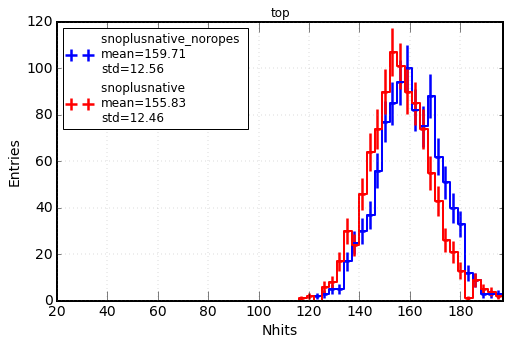

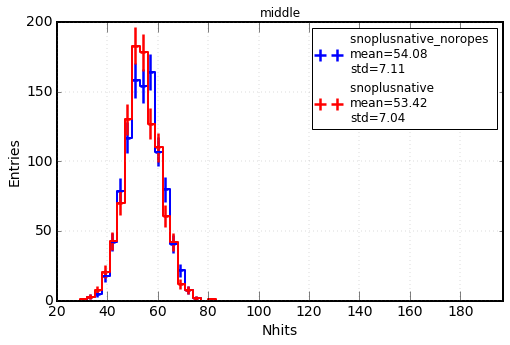

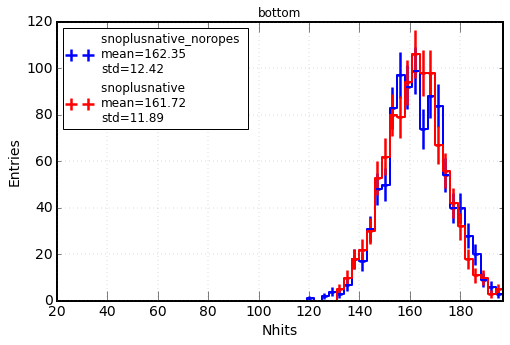

In [36]:
plotComparison(datasets = ['snoplusnative_noropes',  
                           'snoplusnative'],
               datakey = 'nhit',
               scale_factor = [1.,1.],
               figname = 'PBomb380_nhit_native_noropes',
               xaxis = np.arange(20,200,3),
               xlabel = 'Nhits',
               ylabel = 'Entries')

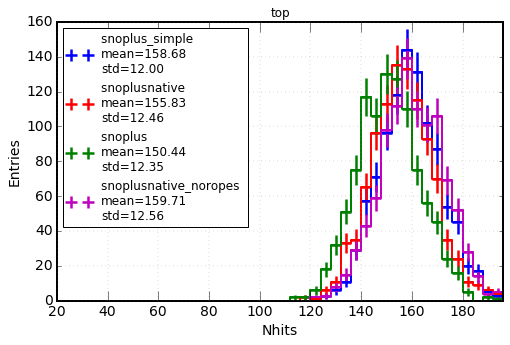

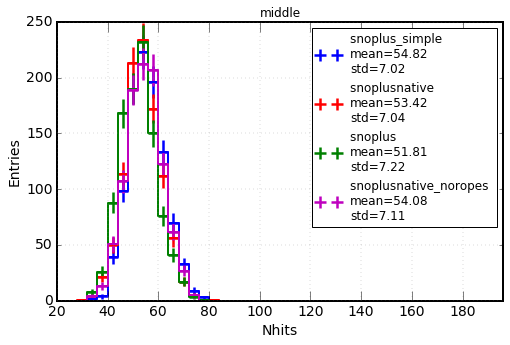

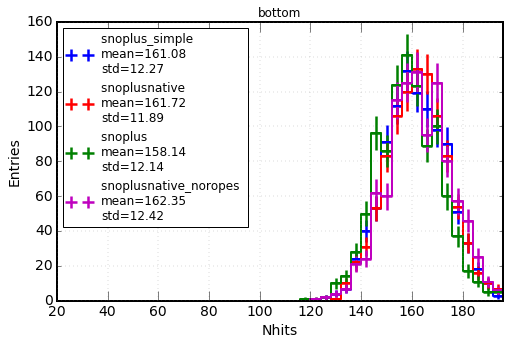

In [28]:
plotComparison(datasets = ['snoplus_simple', 'snoplusnative', 
                           'snoplus', 'snoplusnative_noropes'],
               datakey = 'nhit',
               figname = 'PBomb380_nhit_native_vs_simple',
               xaxis = np.arange(20,200,4),
               xlabel = 'Nhits',
               ylabel = 'Entries')

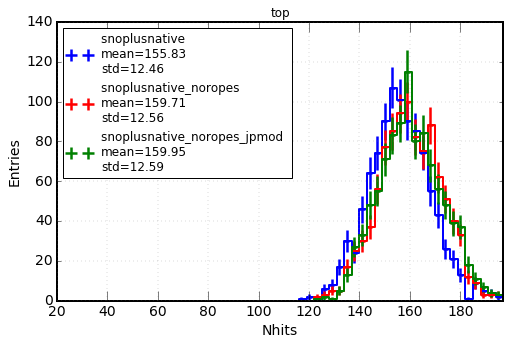

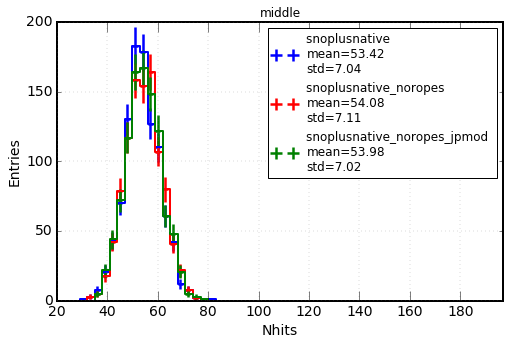

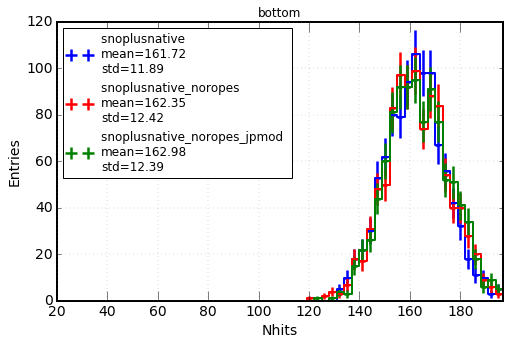

In [30]:
plotComparison(datasets = [ 'snoplusnative','snoplusnative_noropes',
                          'snoplusnative_noropes_jpmod'],
               datakey = 'nhit',
               scale_factor = [1.,1.,1.],
               figname = 'PBomb380_nhit_native_vs_jpmod',
               xaxis = np.arange(20,200,3),
               xlabel = 'Nhits',
               ylabel = 'Entries')

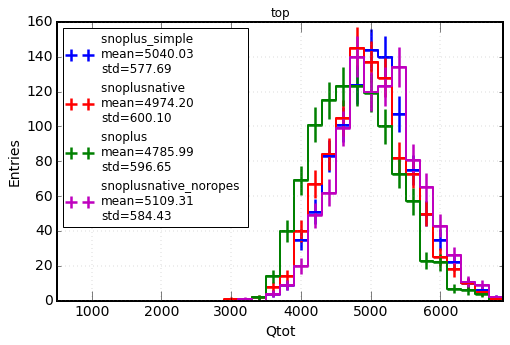

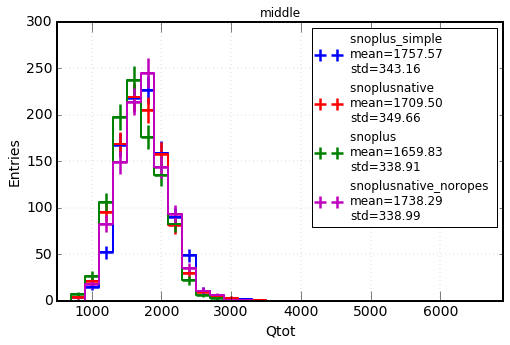

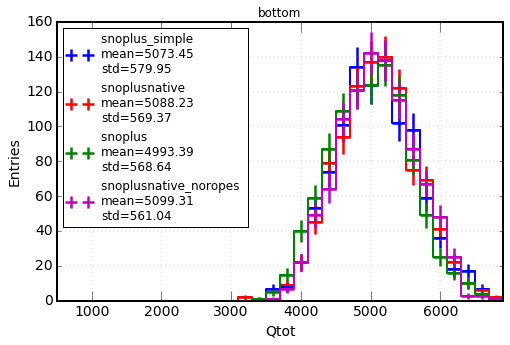

In [31]:
plotComparison(datasets = ['snoplus_simple', 'snoplusnative', 
                           'snoplus', 'snoplusnative_noropes'],
              datakey = 'qtot',
              figname = 'PBomb380_qtot_native_vs_simple',
              xaxis = np.arange(500,7000,200),
              xlabel = 'Qtot',
              ylabel = 'Entries')

#### Water comparisons

In [20]:
readFile('snoplus_simple_h2o','pbomb380.root')

This directory is already inside: snoplus_simple_h2o


In [21]:
readFile('snoplusnative_h2o','pbomb380.root')

This directory is already inside: snoplusnative_h2o



**** neck *****

snoplus_simple_h2o
SUM  13.0
Mean  0.013
Std   0.113274004079

snoplusnative_h2o
SUM  6.0
Mean  0.006
Std   0.0772269383052

**** top *****

snoplus_simple_h2o
SUM  169886.0
Mean  169.886
Std   12.298658626

snoplusnative_h2o
SUM  165198.0
Mean  165.198
Std   12.2897028443

**** middle *****

snoplus_simple_h2o
SUM  59067.0
Mean  59.067
Std   7.35353731207

snoplusnative_h2o
SUM  55863.0
Mean  55.863
Std   7.20834453949

**** bottom *****

snoplus_simple_h2o
SUM  174067.0
Mean  174.067
Std   12.5813556901

snoplusnative_h2o
SUM  171074.0
Mean  171.074
Std   12.516250397


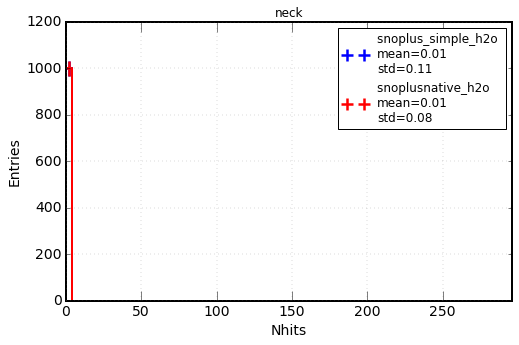

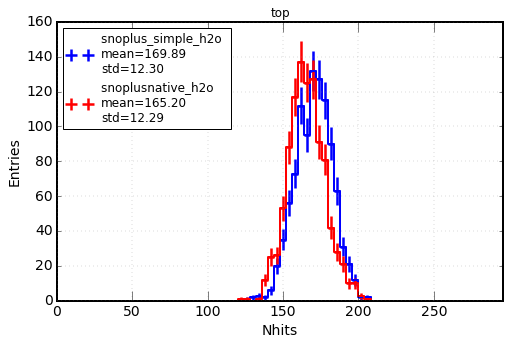

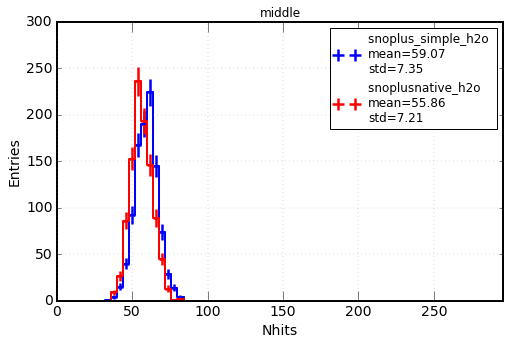

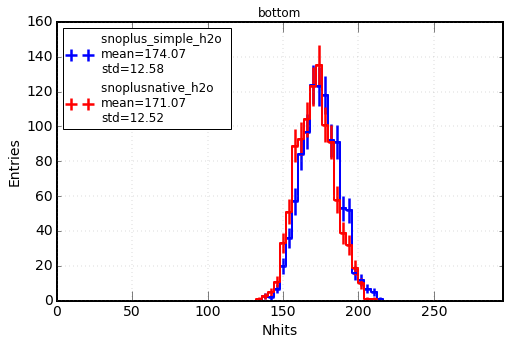

In [30]:
plotComparison(datasets = ['snoplus_simple_h2o', 'snoplusnative_h2o'],
              datakey = 'nhit',
              figname = 'PBomb380_nhit_native_vs_simple_water',
              xaxis = np.arange(0,300,4),
              xlabel = 'Nhits',
              ylabel = 'Entries')


**** neck *****

snoplus_simple_h2o
SUM  300.080133021
Mean  0.300080133021
Std   3.06928577065

snoplusnative_h2o
SUM  98.443341434
Mean  0.098443341434
Std   1.97421386724

**** top *****

snoplus_simple_h2o
SUM  5401174.15587
Mean  5401.17415587
Std   607.578002386

snoplusnative_h2o
SUM  5266937.59735
Mean  5266.93759735
Std   602.466710908

**** middle *****

snoplus_simple_h2o
SUM  1887801.52667
Mean  1887.80152667
Std   357.229744205

snoplusnative_h2o
SUM  1805262.61237
Mean  1805.26261237
Std   349.712860556

**** bottom *****

snoplus_simple_h2o
SUM  5508045.82764
Mean  5508.04582764
Std   604.439425259

snoplusnative_h2o
SUM  5390723.13134
Mean  5390.72313134
Std   569.905099102


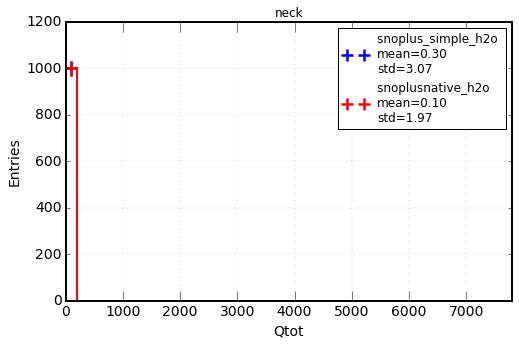

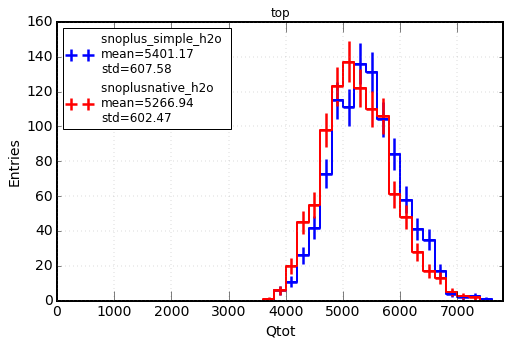

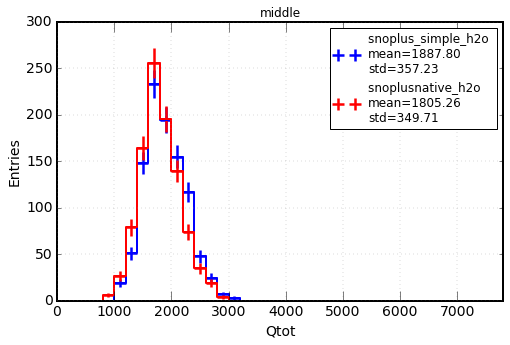

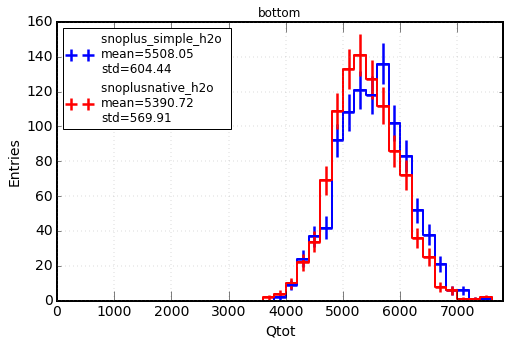

In [31]:
plotComparison(datasets = ['snoplus_simple_h2o', 'snoplusnative_h2o'],
              datakey = 'qtot',
              figname = 'PBomb380_qtot_native_vs_simple_water',
              xaxis = np.arange(0,8000,200),
              xlabel = 'Qtot',
              ylabel = 'Entries')